In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# dataset 불러오기
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [5]:
# 라벨의 분포 확인
train['type'].value_counts()

QSO                    49680
GALAXY                 37347
SERENDIPITY_BLUE       21760
SPECTROPHOTO_STD       14630
REDDEN_STD             14618
STAR_RED_DWARF         13750
STAR_BHB               13500
SERENDIPITY_FIRST       7132
ROSAT_D                 6580
STAR_CATY_VAR           6506
SERENDIPITY_DISTANT     4654
STAR_CARBON             3257
SERENDIPITY_RED         2562
STAR_WHITE_DWARF        2160
STAR_SUB_DWARF          1154
STAR_BROWN_DWARF         500
SKY                      127
SERENDIPITY_MANUAL        61
STAR_PN                   13
Name: type, dtype: int64

In [5]:
# 범주형 변수를 제외한 데이터
train_set = train.drop(['fiberID','type'],  axis=1)
train_set.head()

,id,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
0,0,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,21.387653,21.572827,22.504317,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340
1,1,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,20.937731,21.063646,21.360701,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314
2,2,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,17.095999,17.076449,17.867253,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928
3,3,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,20.073852,19.794505,20.433907,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855
4,4,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,19.861718,18.810375,25.859229,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655


In [8]:
# 연속형 변수 데이터에서 OUTLIER를 제거한 데이터, 그리고 OUTLIER 데이터 분리
from scipy import stats
train_outL = train_set[(np.abs(stats.zscore(train_set)) >= 3).all(axis=1)]
train_NoutL = train_set[(np.abs(stats.zscore(train_set)) < 3).all(axis=1)]
train_NoutL.head()

,id,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
0,0,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,21.387653,21.572827,22.504317,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340
1,1,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,20.937731,21.063646,21.360701,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314
2,2,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,17.095999,17.076449,17.867253,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928
3,3,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,20.073852,19.794505,20.433907,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855
4,4,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,19.861718,18.810375,25.859229,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655


In [ ]:

corr = train_NoutL.corr(method='pearson')

f = plt.figure(figsize=(20, 16))
plt.matshow(corr, fignum=f.number)
plt.xticks(range(train_NoutL.shape[1]), train_NoutL.columns, fontsize=10, rotation=90)
plt.yticks(range(train_NoutL.shape[1]), train_NoutL.columns, fontsize=10)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

#plt.title('Correlation Matrix', fontsize=16);

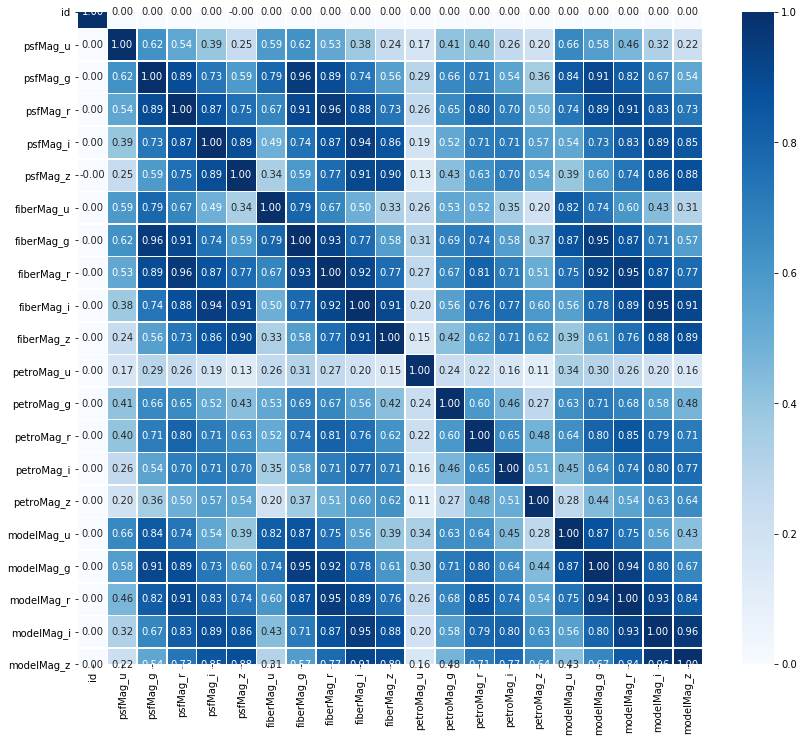

In [18]:
import seaborn as sns 

plt.figure(figsize=(14,12))
corr = train_NoutL.corr(method='pearson')
sns.heatmap(data = corr, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

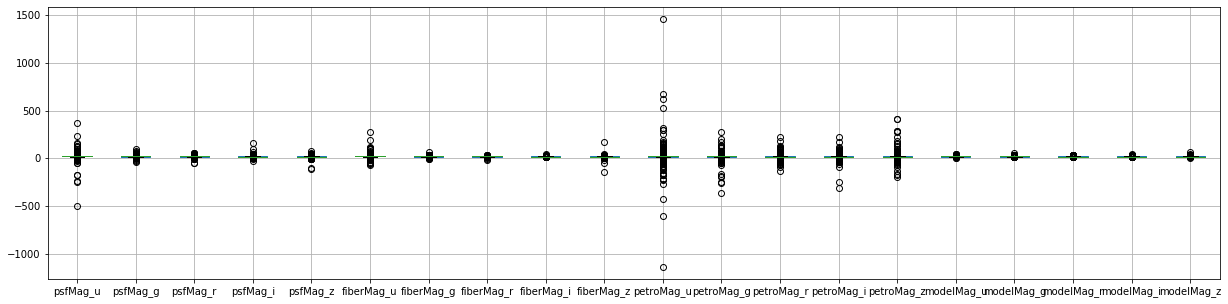

In [20]:
plt.figure(figsize=(21,5))
train_NoutL.drop(['id'], axis=1).boxplot()

In [31]:
# psfMag_u
# fiberMag_u
# petroMag_u
train_NoutL_t = pd.merge(train_NoutL, train[['id','type']], how='left', on='id')
train_outL_t = pd.merge(train_outL, train[['id','type']], how='left', on='id')

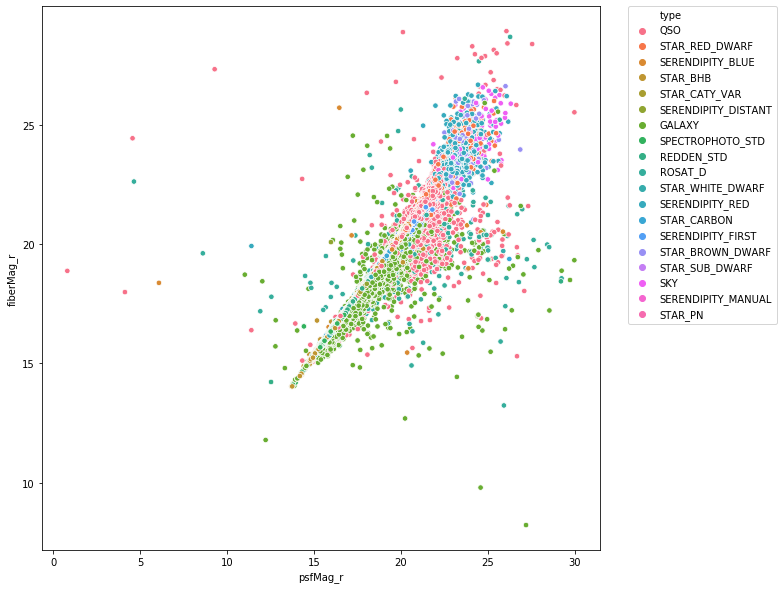

In [42]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='psfMag_r', y='fiberMag_r', 
                s=30, # marker size
                hue='type',
                #data=train_NoutL_t)
                data=train_NoutL_t.loc[(train_NoutL_t['psfMag_r'] > 0) & (train_NoutL_t['psfMag_r'] < 30) & (train_NoutL_t['fiberMag_r'] > 0) & (train_NoutL_t['fiberMag_r'] < 30)])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

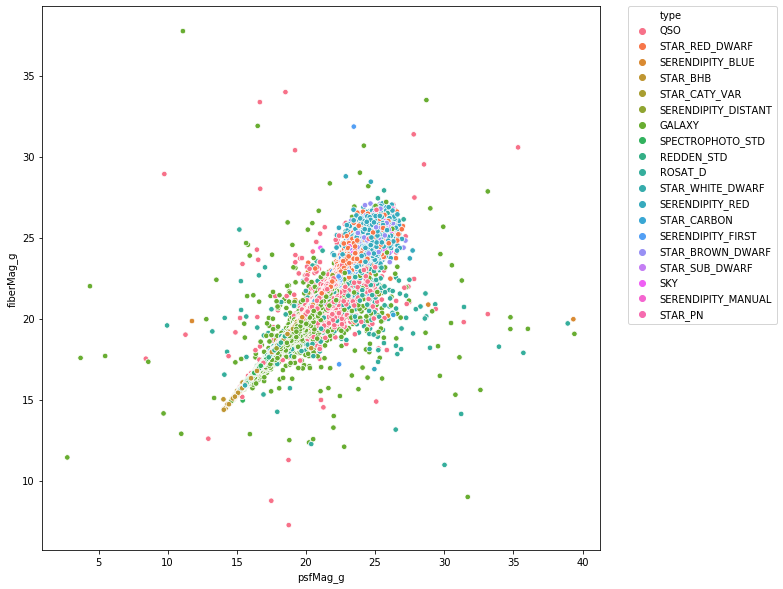

In [40]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='psfMag_g', y='fiberMag_g', 
                s=30, # marker size
                hue='type',
                # data=train_NoutL_t)
                data=train_NoutL_t.loc[(train_NoutL_t['psfMag_g'] > 0) & (train_NoutL_t['psfMag_g'] < 40) & (train_NoutL_t['fiberMag_g'] > 0) & (train_NoutL_t['fiberMag_g'] < 40)])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [45]:
from sklearn.model_selection import train_test_split
y = train['type']
X = train[['psfMag_g','psfMag_r','fiberMag_g','fiberMag_r','modelMag_g','modelMag_r']]

X_train, X_test, y_train, y_test =\
       train_test_split(X, y, 
                        test_size=0.3, 
                        random_state=1,
                        stratify=y)

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=1)
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, learning_rate=0.1, random_state=1)
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('결정 트리의 훈련 정확도/테스트 정확도 %.3f/%.3f'
      % (tree_train, tree_test))

ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

ada_train = accuracy_score(y_train, y_train_pred) 
ada_test = accuracy_score(y_test, y_test_pred) 
print('에이다부스트의 훈련 정확도/테스트 정확도 %.3f/%.3f'
      % (ada_train, ada_test))

결정 트리의 훈련 정확도/테스트 정확도 0.404/0.404
에이다부스트의 훈련 정확도/테스트 정확도 0.285/0.285
